In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

In [2]:
# to hide solution until toggled...

from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

In [3]:
import matplotlib.pyplot as plt
import networkx as nx   #导入networkX包
import numpy as np    #导入numpy包
import seaborn as sns

from utils import decorate, savefig

# Set the random seed so the notebook produces the same results every time.
np.random.seed(17)

In [4]:
def flip(p):
    return np.random.random() < p #np has random_module.random_method
#np.random.random()代表np函数库中的random(),作用是随机输出0-1的任意数

In [5]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

In [6]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

1.0444444444444445
1.0454545454545454
1.0465116279069768
1.0476190476190477
1.048780487804878
1.05
1.0512820512820513
1.0526315789473684
1.054054054054054
1.0555555555555556
1.0571428571428572
1.0588235294117647
1.0606060606060606
1.0625
1.064516129032258
1.0666666666666667
1.0689655172413792
1.0714285714285714
1.0740740740740742
1.0769230769230769
1.08
1.0833333333333333
1.0869565217391304
1.0909090909090908
1.0952380952380953
1.1
1.105263157894737
1.1111111111111112
1.1176470588235294
1.125
1.1333333333333333
1.1428571428571428
1.1538461538461537
1.1666666666666667
1.1818181818181819
1.2
1.2222222222222223
1.25
1.2857142857142858
1.3333333333333333
1.4
1.5
1.6666666666666667
2.0
3.0


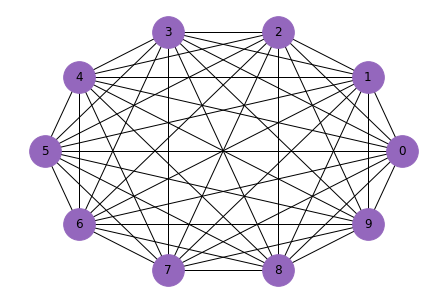

In [7]:
import random

def m_pairs(nodes, m):
    pairs = list(all_pairs(nodes))
    return random.sample(pairs, m)

def all_edges(nodes):
    for u in nodes:
        for v in nodes:
            if u < v:
                yield u, v

def m_pairs(nodes, m):
    n = len(nodes)
    num = m
    den = n * (n-1) / 2 
    for edge in all_edges(nodes):
        p = num / den
        print(p)
        if flip(p):
            num -= 1
            den -= 1
            yield edge
        else:
            den -= 1

def make_m_graph(n, m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes, m))
    return G

m_graph = make_m_graph(10, 47)

nx.draw_circular(m_graph, 
                 node_color='C4', 
                 node_size=1000, 
                 with_labels=True)

hide_toggle()

In [8]:
m_graph.number_of_edges();

In [9]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In [10]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G) #len(G) is the number of nodes in the graph

#there is also a built in function to do this with nx.is_connected(complete)

In [11]:
# version with a for loop

def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [12]:
# version with a list comprehension

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

In [13]:
def prob_m_connected(n, m, iters=100):
    count = 0
    for i in range(iters):
        m_graph = make_m_graph(n, m)
        if is_connected(m_graph):
            count += 1
    return count/iters

n = 10
pstar = np.log(n) / n
ps = np.logspace(-1.3, 0, 11)
ms = [int(p * n * (n-1) / 2) for p in ps]
ys = [prob_m_connected(n, m, 100) for m in ms]

for p, m, y in zip(ps, ms, ys):
    print(p, m, y)

0.044444444444444446
0.045454545454545456
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.02631578947368421
0.02702702702702703
0.027777777777777776
0.02857142857142857
0.029411764705882353
0.030303030303030304
0.03125
0.03225806451612903
0.03333333333333333
0.034482758620689655
0.03571428571428571
0.037037037037037035
0.038461538461538464
0.04
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.044444444444444446
0.045454545454545456
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.10526315789473684
0.1111111111111111
0.117647058

0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.044444444444444446
0.045454545454545456
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.044444444444444446
0.045454545454545456
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06

0.044444444444444446
0.045454545454545456
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.030303030303030304
0.03125
0.03225806451612903
0.03333333333333333
0.034482758620689655
0.03571428571428571
0.037037037037037035
0.038461538461538464
0.04
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.044444444444444446
0.045454545454545456
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.029411764705882353
0.030303030303030304
0.03125
0.03225806451612903
0.03333333333333333
0.034482758620689655
0.03571428571428571
0.037037037037037035
0.038461538461538464
0.04
0.041666666666666664
0.043478260869565216
0.045454545454545456
0.047619047619047616
0.05
0.05263157894736842
0.05555555555555555
0

0.12
0.125
0.13043478260869565
0.13636363636363635
0.09523809523809523
0.1
0.10526315789473684
0.1111111111111111
0.11764705882352941
0.125
0.13333333333333333
0.14285714285714285
0.15384615384615385
0.16666666666666666
0.18181818181818182
0.1
0.1111111111111111
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06666666666666667
0.06818181818181818
0.06976744186046512
0.07142857142857142
0.07317073170731707
0.075
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.08333333333333333
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.0967741935483871
0.1
0.10344827586206896
0.10714285714285714
0.1111111111111111
0.11538461538461539
0.12
0.125
0.13043478260869565
0.13636363636363635
0.14285714285714285
0.1
0.10526315789473684
0.1111111111111111
0.11764705882352941
0.125
0.13333333333333333
0.14285714285714285
0.15384615384615385
0.16666666666666666
0.18181818181818182
0.2
0.2222222222222222
0.25
0.2857142857142857
0.3333333333333333
0.4
0.5
0.3333333333333333
0.0
0.0
0.066666

0.3333333333333333
0.2
0.25
0.0
0.0
0.0
0.06666666666666667
0.06818181818181818
0.06976744186046512
0.07142857142857142
0.07317073170731707
0.075
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.045454545454545456
0.047619047619047616
0.05
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06666666666666667
0.06818181818181818
0.06976744186046512
0.07142857142857142
0.07317073170731707
0.075
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.08333333333333333
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.0967741935483

0.1111111111111111
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.0967741935483871
0.1
0.10344827586206896
0.10714285714285714
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.10526315789473684
0.1111111111111111
0.11764705882352941
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08888888888888889
0.09090909090909091
0.09302325581395349
0.07142857142857142
0.07317073170731707
0.075
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.08333333333333333
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.0967741935483871
0.1
0.10344827586206896
0.10714285714285714
0.1111111111111111
0.11538461538461539
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.10526315789473684
0.1111111111111111
0.117647058823

0.045454545454545456
0.047619047619047616
0.05
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08888888888888889
0.09090909090909091
0.09302325581395349
0.09523809523809523
0.07317073170731707
0.075
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.08333333333333333
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.0967741935483871
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.05
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.25
0.3333333333333333
0.5
1.0
0.08888888888888889
0.09090909090909091
0.09302325581395349
0.09523809523809523
0.0975609756

0.0
0.0
0.08888888888888889
0.09090909090909091
0.09302325581395349
0.09523809523809523
0.0975609756097561
0.1
0.10256410256410256
0.10526315789473684
0.10810810810810811
0.1111111111111111
0.11428571428571428
0.11764705882352941
0.12121212121212122
0.125
0.12903225806451613
0.13333333333333333
0.13793103448275862
0.14285714285714285
0.1111111111111111
0.11538461538461539
0.12
0.125
0.13043478260869565
0.13636363636363635
0.14285714285714285
0.15
0.10526315789473684
0.1111111111111111
0.11764705882352941
0.125
0.13333333333333333
0.14285714285714285
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08888888888888889
0.09090909090909091
0.09302325581395349
0.09523809523809523
0.0975609756097561
0.1
0.10256410256410256
0.10526315789473684
0.10810810810810811
0.08333333333333333
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.0967741935483871
0.1
0.10344827586206896
0.10714285714285714
0.1111111111111111
0.115384615

0.12121212121212122
0.125
0.0967741935483871
0.1
0.10344827586206896
0.10714285714285714
0.1111111111111111
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.047619047619047616
0.05
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.25
0.3333333333333333
0.5
0.0
0.1111111111111111
0.09090909090909091
0.09302325581395349
0.09523809523809523
0.0975609756097561
0.1
0.10256410256410256
0.10526315789473684
0.08108108108108109
0.08333333333333333
0.08571428571428572
0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.04
0.041666666666666664
0.043478260869565216
0.045454545454545456
0.047619047619047616
0.05
0.05263157894736842
0.05555555555555555
0.05

0.15384615384615385
0.16666666666666666
0.09090909090909091
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.0
0.0
0.0
0.0
0.1111111111111111
0.11363636363636363
0.11627906976744186
0.11904761904761904
0.12195121951219512
0.125
0.1282051282051282
0.10526315789473684
0.10810810810810811
0.1111111111111111
0.11428571428571428
0.08823529411764706
0.09090909090909091
0.0625
0.06451612903225806
0.03333333333333333
0.034482758620689655
0.03571428571428571
0.037037037037037035
0.038461538461538464
0.04
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.11363636363636363
0.11627906976744186
0.09523809523809523
0.0975609756097561
0.1
0.10256410256410256
0.10526315789473684
0.10810810810810811
0.1111111111111111
0.11428571428571428
0.11764705882352941
0.12121212121212122
0.125
0.12903225806451613
0.13333333333333333
0.13793103448275862
0.14285714285714285
0.14814814814814814
0.15384615384615385
0.16
0.166

0.0
0.0
0.0
0.0
0.1111111111111111
0.09090909090909091
0.09302325581395349
0.09523809523809523
0.0975609756097561
0.1
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.030303030303030304
0.03125
0.03225806451612903
0.03333333333333333
0.034482758620689655
0.03571428571428571
0.037037037037037035
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.11363636363636363
0.11627906976744186
0.11904761904761904
0.12195121951219512
0.125
0.1282051282051282
0.13157894736842105
0.13513513513513514
0.1388888888888889
0.14285714285714285
0.14705882352941177
0.15151515151515152
0.15625
0.16129032258064516
0.16666666666666666
0.13793103448275862
0.14285714285714285
0.14814814814814814
0.11538461538461539
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.062

0.21052631578947367
0.2222222222222222
0.23529411764705882
0.25
0.26666666666666666
0.2857142857142857
0.3076923076923077
0.3333333333333333
0.36363636363636365
0.4
0.4444444444444444
0.5
0.42857142857142855
0.5
0.4
0.5
0.3333333333333333
0.5
1.0
0.15555555555555556
0.13636363636363635
0.13953488372093023
0.14285714285714285
0.14634146341463414
0.15
0.15384615384615385
0.15789473684210525
0.16216216216216217
0.1388888888888889
0.14285714285714285
0.14705882352941177
0.12121212121212122
0.125
0.12903225806451613
0.13333333333333333
0.13793103448275862
0.14285714285714285
0.14814814814814814
0.15384615384615385
0.16
0.16666666666666666
0.17391304347826086
0.18181818181818182
0.14285714285714285
0.15
0.15789473684210525
0.16666666666666666
0.17647058823529413
0.1875
0.2
0.21428571428571427
0.23076923076923078
0.25
0.2727272727272727
0.2
0.2222222222222222
0.125
0.14285714285714285
0.16666666666666666
0.2
0.25
0.3333333333333333
0.5
1.0
0.15555555555555556
0.1590909090909091
0.139534883720

0.2
0.0
0.0
0.0
0.0
0.15555555555555556
0.1590909090909091
0.16279069767441862
0.16666666666666666
0.17073170731707318
0.175
0.1794871794871795
0.18421052631578946
0.1891891891891892
0.19444444444444445
0.17142857142857143
0.17647058823529413
0.18181818181818182
0.1875
0.1935483870967742
0.2
0.20689655172413793
0.21428571428571427
0.2222222222222222
0.23076923076923078
0.24
0.25
0.21739130434782608
0.22727272727272727
0.23809523809523808
0.25
0.2631578947368421
0.2777777777777778
0.23529411764705882
0.25
0.26666666666666666
0.2857142857142857
0.3076923076923077
0.3333333333333333
0.36363636363636365
0.4
0.4444444444444444
0.5
0.5714285714285714
0.5
0.6
0.5
0.6666666666666666
0.5
0.0
0.15555555555555556
0.1590909090909091
0.16279069767441862
0.14285714285714285
0.14634146341463414
0.15
0.15384615384615385
0.15789473684210525
0.16216216216216217
0.16666666666666666
0.14285714285714285
0.14705882352941177
0.15151515151515152
0.15625
0.16129032258064516
0.16666666666666666
0.13793103448275

0.2222222222222222
0.22727272727272727
0.20930232558139536
0.19047619047619047
0.1951219512195122
0.2
0.1794871794871795
0.18421052631578946
0.1891891891891892
0.16666666666666666
0.17142857142857143
0.17647058823529413
0.18181818181818182
0.1875
0.16129032258064516
0.16666666666666666
0.1724137931034483
0.17857142857142858
0.18518518518518517
0.19230769230769232
0.16
0.16666666666666666
0.13043478260869565
0.13636363636363635
0.14285714285714285
0.1
0.10526315789473684
0.1111111111111111
0.11764705882352941
0.125
0.13333333333333333
0.14285714285714285
0.15384615384615385
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.25
0.3333333333333333
0.5
1.0
0.2222222222222222
0.20454545454545456
0.20930232558139536
0.21428571428571427
0.21951219512195122
0.225
0.23076923076923078
0.23684210526315788
0.24324324324324326
0.2222222222222222
0.22857142857142856
0.20588235294117646
0.18181818181818182
0.1875
0.16129032258064516
0.16

0.2692307692307692
0.28
0.25
0.2608695652173913
0.2727272727272727
0.2857142857142857
0.3
0.3157894736842105
0.3333333333333333
0.29411764705882354
0.3125
0.3333333333333333
0.2857142857142857
0.23076923076923078
0.25
0.2727272727272727
0.3
0.2222222222222222
0.25
0.2857142857142857
0.16666666666666666
0.0
0.0
0.0
0.0
0.0
0.2222222222222222
0.22727272727272727
0.23255813953488372
0.23809523809523808
0.24390243902439024
0.25
0.2564102564102564
0.2631578947368421
0.24324324324324326
0.25
0.2571428571428571
0.2647058823529412
0.2727272727272727
0.28125
0.2903225806451613
0.3
0.3103448275862069
0.2857142857142857
0.2962962962962963
0.2692307692307692
0.24
0.25
0.2608695652173913
0.2727272727272727
0.2857142857142857
0.3
0.3157894736842105
0.3333333333333333
0.35294117647058826
0.375
0.4
0.42857142857142855
0.46153846153846156
0.5
0.45454545454545453
0.5
0.5555555555555556
0.625
0.5714285714285714
0.6666666666666666
0.8
0.75
1.0
1.0
1.0
0.2222222222222222
0.22727272727272727
0.2325581395348

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.2222222222222222
0.22727272727272727
0.23255813953488372
0.23809523809523808
0.24390243902439024
0.25
0.2564102564102564
0.2631578947368421
0.2702702702702703
0.2777777777777778
0.2857142857142857
0.2647058823529412
0.2727272727272727
0.28125
0.25806451612903225
0.26666666666666666
0.27586206896551724
0.2857142857142857
0.2962962962962963
0.3076923076923077
0.28
0.2916666666666667
0.30434782608695654
0.3181818181818182
0.3333333333333333
0.35
0.3157894736842105
0.3333333333333333
0.35294117647058826
0.375
0.4
0.42857142857142855
0.38461538461538464
0.3333333333333333
0.2727272727272727
0.2
0.2222222222222222
0.25
0.2857142857142857
0.16666666666666666
0.2
0.25
0.3333333333333333
0.0
0.0
0.2222222222222222
0.22727272727272727
0.23255813953488372
0.23809523809523808
0.24390243902439024
0.25
0.2564102564102564
0.2631578947368421
0.2702702702702703
0.25
0.2571428571428571
0.2647058823529412
0.2727272727272727
0.25
0.22580645161290322
0.23333333

0.32142857142857145
0.2962962962962963
0.3076923076923077
0.28
0.2916666666666667
0.30434782608695654
0.3181818181818182
0.3333333333333333
0.35
0.3157894736842105
0.2777777777777778
0.29411764705882354
0.3125
0.26666666666666666
0.21428571428571427
0.23076923076923078
0.16666666666666666
0.09090909090909091
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.28888888888888886
0.29545454545454547
0.3023255813953488
0.30952380952380953
0.3170731707317073
0.325
0.3333333333333333
0.3157894736842105
0.32432432432432434
0.3333333333333333
0.3142857142857143
0.3235294117647059
0.3333333333333333
0.34375
0.3225806451612903
0.3
0.3103448275862069
0.2857142857142857
0.2962962962962963
0.3076923076923077
0.32
0.3333333333333333
0.30434782608695654
0.2727272727272727
0.2857142857142857
0.3
0.3157894736842105
0.2777777777777778
0.23529411764705882
0.25
0.26666666666666666
0.21428571428571427
0.23076923076923078
0.25
0.18181818181818182
0.1
0.1111111111111111
0.125
0.14285714285714285
0.0
0.0
0.0
0.0
0.0
0.

0.34375
0.3225806451612903
0.3333333333333333
0.3103448275862069
0.2857142857142857
0.2962962962962963
0.3076923076923077
0.28
0.2916666666666667
0.30434782608695654
0.3181818181818182
0.3333333333333333
0.35
0.3684210526315789
0.3888888888888889
0.35294117647058826
0.3125
0.3333333333333333
0.2857142857142857
0.23076923076923078
0.25
0.18181818181818182
0.2
0.2222222222222222
0.25
0.2857142857142857
0.3333333333333333
0.4
0.5
0.3333333333333333
0.0
0.0
0.28888888888888886
0.29545454545454547
0.3023255813953488
0.30952380952380953
0.2926829268292683
0.3
0.28205128205128205
0.2894736842105263
0.2972972972972973
0.3055555555555556
0.2857142857142857
0.2647058823529412
0.24242424242424243
0.21875
0.22580645161290322
0.2
0.20689655172413793
0.21428571428571427
0.2222222222222222
0.23076923076923078
0.24
0.25
0.21739130434782608
0.22727272727272727
0.23809523809523808
0.2
0.21052631578947367
0.16666666666666666
0.17647058823529413
0.125
0.13333333333333333
0.14285714285714285
0.153846153846

0.16666666666666666
0.17647058823529413
0.1875
0.13333333333333333
0.14285714285714285
0.15384615384615385
0.08333333333333333
0.09090909090909091
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.28888888888888886
0.29545454545454547
0.3023255813953488
0.30952380952380953
0.3170731707317073
0.3
0.3076923076923077
0.3157894736842105
0.2972972972972973
0.2777777777777778
0.2857142857142857
0.29411764705882354
0.30303030303030304
0.3125
0.3225806451612903
0.3333333333333333
0.3448275862068966
0.32142857142857145
0.3333333333333333
0.34615384615384615
0.36
0.3333333333333333
0.34782608695652173
0.36363636363636365
0.38095238095238093
0.4
0.42105263157894735
0.3888888888888889
0.4117647058823529
0.375
0.4
0.42857142857142855
0.38461538461538464
0.4166666666666667
0.36363636363636365
0.4
0.3333333333333333
0.375
0.42857142857142855
0.5
0.6
0.75
1.0
1.0
1.0
0.28888888888888886
0.29545454545454547
0.3023255813953488
0.30952380952380953
0.3170731707317073
0.3
0.28205128205128205
0.2894736842105263
0.2

0.3157894736842105
0.3333333333333333
0.35294117647058826
0.375
0.4
0.42857142857142855
0.38461538461538464
0.4166666666666667
0.45454545454545453
0.5
0.5555555555555556
0.625
0.5714285714285714
0.6666666666666666
0.6
0.5
0.3333333333333333
0.5
0.0
0.28888888888888886
0.2727272727272727
0.2558139534883721
0.2619047619047619
0.2682926829268293
0.275
0.2564102564102564
0.2631578947368421
0.2702702702702703
0.2777777777777778
0.2857142857142857
0.2647058823529412
0.2727272727272727
0.28125
0.25806451612903225
0.23333333333333334
0.2413793103448276
0.25
0.25925925925925924
0.23076923076923078
0.24
0.25
0.2608695652173913
0.2727272727272727
0.2857142857142857
0.3
0.3157894736842105
0.3333333333333333
0.35294117647058826
0.3125
0.3333333333333333
0.2857142857142857
0.3076923076923077
0.3333333333333333
0.2727272727272727
0.3
0.3333333333333333
0.375
0.2857142857142857
0.16666666666666666
0.2
0.25
0.3333333333333333
0.0
0.0
0.4
0.4090909090909091
0.3953488372093023
0.38095238095238093
0.39024

0.35294117647058826
0.36363636363636365
0.375
0.3548387096774194
0.36666666666666664
0.3448275862068966
0.35714285714285715
0.37037037037037035
0.38461538461538464
0.36
0.375
0.391304347826087
0.4090909090909091
0.42857142857142855
0.45
0.47368421052631576
0.4444444444444444
0.47058823529411764
0.4375
0.4
0.35714285714285715
0.38461538461538464
0.4166666666666667
0.45454545454545453
0.5
0.4444444444444444
0.375
0.42857142857142855
0.5
0.6
0.5
0.3333333333333333
0.0
0.0
0.4
0.38636363636363635
0.3953488372093023
0.40476190476190477
0.4146341463414634
0.4
0.41025641025641024
0.42105263157894735
0.43243243243243246
0.4166666666666667
0.42857142857142855
0.4411764705882353
0.42424242424242425
0.4375
0.45161290322580644
0.4666666666666667
0.4482758620689655
0.4642857142857143
0.4444444444444444
0.4230769230769231
0.44
0.4583333333333333
0.4782608695652174
0.5
0.5238095238095238
0.55
0.5789473684210527
0.6111111111111112
0.6470588235294118
0.625
0.6
0.5714285714285714
0.6153846153846154
0.66

0.35714285714285715
0.38461538461538464
0.4166666666666667
0.36363636363636365
0.4
0.4444444444444444
0.5
0.5714285714285714
0.5
0.6
0.5
0.3333333333333333
0.0
0.0
0.4
0.38636363636363635
0.3953488372093023
0.38095238095238093
0.36585365853658536
0.375
0.358974358974359
0.3684210526315789
0.3783783783783784
0.3888888888888889
0.37142857142857144
0.35294117647058826
0.36363636363636365
0.375
0.3870967741935484
0.36666666666666664
0.3448275862068966
0.35714285714285715
0.3333333333333333
0.34615384615384615
0.36
0.3333333333333333
0.34782608695652173
0.3181818181818182
0.3333333333333333
0.3
0.3157894736842105
0.2777777777777778
0.29411764705882354
0.25
0.26666666666666666
0.2857142857142857
0.3076923076923077
0.3333333333333333
0.36363636363636365
0.3
0.3333333333333333
0.25
0.2857142857142857
0.3333333333333333
0.4
0.5
0.3333333333333333
0.5
0.0
0.4
0.38636363636363635
0.37209302325581395
0.35714285714285715
0.34146341463414637
0.325
0.3333333333333333
0.34210526315789475
0.35135135135

0.5333333333333333
0.5454545454545454
0.5581395348837209
0.5714285714285714
0.5609756097560976
0.575
0.5897435897435898
0.6052631578947368
0.5945945945945946
0.5833333333333334
0.5714285714285714
0.5882352941176471
0.5757575757575758
0.59375
0.5806451612903226
0.6
0.6206896551724138
0.6071428571428571
0.6296296296296297
0.6153846153846154
0.6
0.5833333333333334
0.5652173913043478
0.5454545454545454
0.5238095238095238
0.55
0.5789473684210527
0.5555555555555556
0.5882352941176471
0.625
0.6
0.5714285714285714
0.6153846153846154
0.5833333333333334
0.5454545454545454
0.6
0.5555555555555556
0.625
0.5714285714285714
0.6666666666666666
0.6
0.5
0.3333333333333333
0.0
0.0
0.5333333333333333
0.5454545454545454
0.5348837209302325
0.5238095238095238
0.5365853658536586
0.525
0.5384615384615384
0.5526315789473685
0.5675675675675675
0.5833333333333334
0.6
0.6176470588235294
0.6060606060606061
0.59375
0.6129032258064516
0.6333333333333333
0.6551724137931034
0.6785714285714286
0.7037037037037037
0.73076

0.48
0.5
0.4782608695652174
0.5
0.5238095238095238
0.5
0.5263157894736842
0.5555555555555556
0.5882352941176471
0.625
0.6
0.5714285714285714
0.5384615384615384
0.5833333333333334
0.5454545454545454
0.5
0.4444444444444444
0.5
0.42857142857142855
0.3333333333333333
0.4
0.25
0.3333333333333333
0.0
0.0
0.5333333333333333
0.5454545454545454
0.5581395348837209
0.5476190476190477
0.5365853658536586
0.525
0.5384615384615384
0.5263157894736842
0.5405405405405406
0.5555555555555556
0.5714285714285714
0.5588235294117647
0.5757575757575758
0.59375
0.5806451612903226
0.5666666666666667
0.5517241379310345
0.5714285714285714
0.5555555555555556
0.5384615384615384
0.56
0.5833333333333334
0.5652173913043478
0.5454545454545454
0.5238095238095238
0.55
0.5263157894736842
0.5555555555555556
0.5882352941176471
0.5625
0.5333333333333333
0.5714285714285714
0.6153846153846154
0.6666666666666666
0.7272727272727273
0.7
0.6666666666666666
0.75
0.7142857142857143
0.6666666666666666
0.6
0.5
0.3333333333333333
0.5
1.

0.45454545454545453
0.5
0.4444444444444444
0.375
0.42857142857142855
0.5
0.6
0.5
0.3333333333333333
0.0
0.0
0.5333333333333333
0.5227272727272727
0.5348837209302325
0.5476190476190477
0.5609756097560976
0.575
0.5897435897435898
0.6052631578947368
0.5945945945945946
0.5833333333333334
0.5714285714285714
0.5588235294117647
0.5757575757575758
0.5625
0.5806451612903226
0.5666666666666667
0.5862068965517241
0.6071428571428571
0.5925925925925926
0.5769230769230769
0.56
0.5416666666666666
0.5652173913043478
0.5454545454545454
0.5238095238095238
0.55
0.5789473684210527
0.5555555555555556
0.5882352941176471
0.5625
0.5333333333333333
0.5714285714285714
0.5384615384615384
0.5
0.45454545454545453
0.4
0.3333333333333333
0.375
0.42857142857142855
0.5
0.4
0.5
0.3333333333333333
0.5
0.0
0.5333333333333333
0.5454545454545454
0.5581395348837209
0.5714285714285714
0.5609756097560976
0.575
0.5897435897435898
0.6052631578947368
0.6216216216216216
0.6111111111111112
0.6
0.5882352941176471
0.5757575757575758

0.6944444444444444
0.6857142857142857
0.6764705882352942
0.6666666666666666
0.65625
0.6774193548387096
0.7
0.7241379310344828
0.75
0.7777777777777778
0.7692307692307693
0.8
0.7916666666666666
0.8260869565217391
0.8181818181818182
0.8095238095238095
0.8
0.8421052631578947
0.8333333333333334
0.8235294117647058
0.8125
0.8
0.7857142857142857
0.7692307692307693
0.8333333333333334
0.8181818181818182
0.9
0.8888888888888888
0.875
0.8571428571428571
0.8333333333333334
0.8
0.75
1.0
1.0
1.0
0.7333333333333333
0.7272727272727273
0.7209302325581395
0.7142857142857143
0.7317073170731707
0.725
0.717948717948718
0.7105263157894737
0.7027027027027027
0.6944444444444444
0.6857142857142857
0.7058823529411765
0.696969696969697
0.6875
0.7096774193548387
0.7
0.6896551724137931
0.7142857142857143
0.7037037037037037
0.7307692307692307
0.72
0.7083333333333334
0.7391304347826086
0.7272727272727273
0.7142857142857143
0.7
0.6842105263157895
0.7222222222222222
0.7058823529411765
0.6875
0.7333333333333333
0.7142857

0.8235294117647058
0.8125
0.8
0.7857142857142857
0.7692307692307693
0.75
0.8181818181818182
0.8
0.7777777777777778
0.875
0.8571428571428571
0.8333333333333334
0.8
0.75
0.6666666666666666
0.5
0.0
0.7333333333333333
0.75
0.7441860465116279
0.7619047619047619
0.7560975609756098
0.75
0.7435897435897436
0.7368421052631579
0.7297297297297297
0.75
0.7428571428571429
0.7647058823529411
0.7575757575757576
0.78125
0.7741935483870968
0.7666666666666667
0.7586206896551724
0.75
0.7407407407407407
0.7307692307692307
0.76
0.75
0.7391304347826086
0.7727272727272727
0.7619047619047619
0.75
0.7368421052631579
0.7222222222222222
0.7647058823529411
0.75
0.7333333333333333
0.7142857142857143
0.6923076923076923
0.6666666666666666
0.6363636363636364
0.6
0.5555555555555556
0.5
0.5714285714285714
0.5
0.4
0.5
0.3333333333333333
0.5
0.0
0.7333333333333333
0.7272727272727273
0.7441860465116279
0.7619047619047619
0.7804878048780488
0.775
0.7692307692307693
0.7894736842105263
0.8108108108108109
0.8055555555555556
0

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.05011872336272722 2 0.0
0.06760829753919818 3 0.0
0.09120108393559097 4 0.0
0.12302687708123815 5 0.0
0.16595869074375605 7 0.0
0.22387211385683395 10 0.24
0.3019951720402016 13 0.72
0.40738027780411273 18 0.95
0.5495408738576245 24 1.0
0.7413102413009173 33 1.0
1.0 45 1.0
